In [ ]:
%pip install qiskit
%pip install pylatexenc
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e74ae938cdd0da27aa48b291798280c5963fdb6b79f71819acab53f2aaf78422
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.9 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
import math

In [ ]:
# useful additional packages
import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In [ ]:
# Creating registers
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

SINGLET

In [ ]:

singlet = QuantumCircuit(qr, cr, name='singlet')
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])

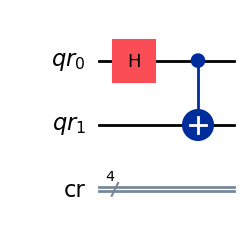

In [ ]:
singlet.draw(output = 'mpl')

Measurement of X,W,Z basis

In [ ]:
measureA1 = QuantumCircuit(qr, cr, name='measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0],cr[0])

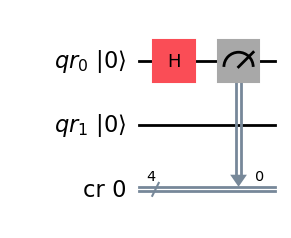

In [ ]:
measureA1.draw('mpl',initial_state=True)

In [ ]:
measureA2 = QuantumCircuit(qr, cr, name='measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])

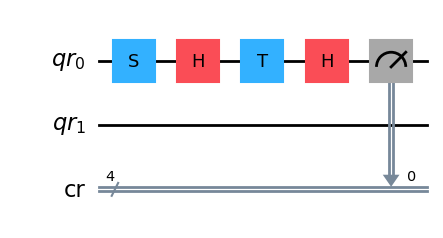

In [ ]:
measureA2.draw("mpl")

In [ ]:
measureA3 = QuantumCircuit(qr, cr, name='measureA3')
measureA3.measure(qr[0],cr[0])

Bobs measurement

In [ ]:
# measure the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureB1 = QuantumCircuit(qr, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

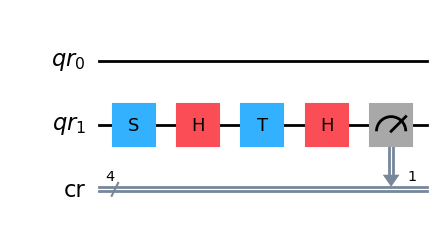

In [ ]:
measureB1.draw("mpl")


In [ ]:
# measure the spin projection of Bob's qubit onto the b_2 direction (standard Z basis)
measureB2 = QuantumCircuit(qr, cr, name='measureB2')
measureB2.measure(qr[1],cr[1])
# measure the spin projection of Bob's qubit onto the b_3 direction (V basis)
measureB3 = QuantumCircuit(qr, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

In [ ]:
import time

start_time = time.time()
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]
numberOfSinglets = 500
aliceMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b' of Bob

In [ ]:
print(aliceMeasurementChoices)
print(len(aliceMeasurementChoices))

[1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 3, 3, 1, 3, 1, 2, 2, 1, 3, 3, 2, 3, 1, 1, 3, 2, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 2, 3, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 3, 3, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 2, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 

In [ ]:
print(bobMeasurementChoices)

[1, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 1, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 3, 2, 1, 3, 2, 1, 2, 3, 2, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 2, 2, 1, 2, 3, 1, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 2, 2, 2, 1, 2, 3, 2, 1, 3, 2, 2, 2, 3, 1, 1, 3, 3, 2, 1, 1, 1, 2, 3, 2, 2, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 1, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 

In [ ]:

circuits = [] # the list in which the created circuits will be stored

for i in range(numberOfSinglets):
    circuitName = singlet & aliceMeasurements[aliceMeasurementChoices[i]-1] & bobMeasurements[bobMeasurementChoices[i]-1]
    circuits.append(circuitName)

In [ ]:
results = []
for i in range (numberOfSinglets):
  simulator = Aer.get_backend("qasm_simulator")
  backend = BasicProvider().get_backend('basic_simulator')
  transpiled_circuit = transpile(circuits[i], backend)

  result = backend.run(transpiled_circuit, shots = 1).result()
  results.append(result)

In [ ]:
results[7].get_counts().keys()

dict_keys(['0001'])

In [ ]:
abPatterns = [
    re.compile('..00$'), # search for the '..00' output (Alice obtained 0 and Bob obtained 0)
    re.compile('..01$'), # search for the '..01' output
    re.compile('..10$'), # search for the '..10' output (Alice obtained 0 and Bob obtained 1)
    re.compile('..11$')  # search for the '..11' output

]


In [ ]:
aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

for i in range(numberOfSinglets):

    #res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit
    res = str(list(results[i].get_counts().keys())[0])
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are 0,0)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(0) # Bob got the result 0
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(0)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are 0,1)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res):
        aliceResults.append(1)
        bobResults.append(1)


In [ ]:
print(aliceResults)

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 

In [ ]:
print(bobResults)


[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 

In [ ]:
aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'

# comparing the stings with measurement choices
for i in range(numberOfSinglets):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(bobResults[i])

keyLength = len(aliceKey) # length of the secret key
print("key length:", keyLength)

key length: 105


In [ ]:
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1
print("Key Mismatch: ", abKeyMismatches)
timeKey=time.time() - start_time
print(f" {timeKey:.6f} seconds.")

Key Mismatch:  0
 25.817981 seconds.


In [ ]:
print(aliceKey)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
print(bobKey)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
''''aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

for i in range(numberOfSinglets):

    #res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit
    res = str(list(results[i].get_counts().keys())[0])
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are 0,0)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(0) # Bob got the result 0
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(0)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are 0,1)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res):
        aliceResults.append(1)
        bobResults.append(1)
print("Alice results after basis measurements",aliceResults)
print(bobResults)
print("Alicebit length after basis measuremt",len(aliceResults))
aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys
for a,b in zip(aliceResults , bobResults):
  if a !=b:
    abKeyMismatches +=1

print("Number of mismatched elements:", abKeyMismatches)

# comparing the stings with measurement choices
for i in range(numberOfSinglets):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(bobResults[i])

keyLength = len(aliceKey) # length of the secret key
print("key length:", keyLength)
aliceKey=time.time() - start_time
print(f" {aliceKey:.6f} seconds.")
print(aliceKey)

print(bobKey)'''

'\'aliceResults = [] # Alice\'s results (string a)\nbobResults = [] # Bob\'s results (string a\')\n\nfor i in range(numberOfSinglets):\n\n    #res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit\n    res = str(list(results[i].get_counts().keys())[0])\n    if abPatterns[0].search(res): # check if the key is \'..00\' (if the measurement results are 0,0)\n        aliceResults.append(0) # Alice got the result 0\n        bobResults.append(0) # Bob got the result 0\n    if abPatterns[1].search(res):\n        aliceResults.append(1)\n        bobResults.append(0)\n    if abPatterns[2].search(res): # check if the key is \'..10\' (if the measurement results are 0,1)\n        aliceResults.append(0) # Alice got the result 0\n        bobResults.append(1) # Bob got the result 1\n    if abPatterns[3].search(res):\n        aliceResults.append(1)\n        bobResults.append(1)\nprint("Alice results after basis 

In [ ]:
import hashlib

def hash_password_with_fixed_salt(password: str, salt: str) -> dict:
    """
    Hashes a password with a fixed salt using SHA-256.

    Args:
        password (str): The plain text password to hash.
        salt (str): The fixed salt value.

    Returns:
        dict: A dictionary containing the fixed salt, hashed password in hex, and hashed password in binary.
    """
    # Encode salt and password
    salt_bytes = salt.encode('utf-8')
    password_bytes = password.encode('utf-8')
    # Hash the password with the fixed salt
    hash_object = hashlib.pbkdf2_hmac('sha256', password_bytes, salt_bytes, 100000)  # 100,000 iterations
    return {
        'salt': salt,  # Keep the fixed salt as it is
        'hashed_password_hex': hash_object.hex(),
        'hashed_password_binary': bin(int(hash_object.hex(), 16))[2:].zfill(256)  # Convert to binary and pad to 256 bits
    }


def verify_password_with_fixed_salt(salt: str, hashed_password: str, password: str) -> bool:
    """
    Verifies a password against a stored hash with fixed salt.

    Args:
        salt (str): The fixed salt value.
        hashed_password (str): The stored hashed password (in hex).
        password (str): The plain text password to verify.

    Returns:
        bool: True if the password matches the stored hash, False otherwise.
    """
    # Hash the provided password with the fixed salt
    new_hashed_password = hash_password_with_fixed_salt(password, salt)['hashed_password_hex']
    # Compare the new hash with the stored hash
    return new_hashed_password == hashed_password

# Example Usage
if __name__ == "__main__":
    # Fixed salt and key
    fixed_salt = "ajsrhfbsdkhcbawskjdSKJZHcbsdjhbcsadkjf enrm mnewbafshdschb...5/.6./.3456"
    aliceKey = "100100010110010110001111100011010100000000001100"

    # Hash the password with fixed salt
    hashed_data = hash_password_with_fixed_salt(aliceKey, fixed_salt)
    print("Fixed Salt:", hashed_data['salt'])
    print("Hashed Password (Hex):", hashed_data['hashed_password_hex'])
    print("Hashed Password (Binary):", hashed_data['hashed_password_binary'])
    print(len(hashed_data))
    # Verify the password with the fixed salt
    is_valid = verify_password_with_fixed_salt(
        hashed_data['salt'],
        hashed_data['hashed_password_hex'],
        aliceKey
    )
    print("Password is valid:", is_valid)

Fixed Salt: ajsrhfbsdkhcbawskjdSKJZHcbsdjhbcsadkjf enrm mnewbafshdschb...5/.6./.3456
Hashed Password (Hex): fb6130ce15d6388ab817fb8e9be23c4553937e0f73801e09db2c20f118b3cb39
Hashed Password (Binary): 1111101101100001001100001100111000010101110101100011100010001010101110000001011111111011100011101001101111100010001111000100010101010011100100110111111000001111011100111000000000011110000010011101101100101100001000001111000100011000101100111100101100111001
3
Password is valid: True


In [ ]:
import math
import hashlib

def calculate_entropy(data: str) -> float:
    """
    Calculates the Shannon entropy of a given string.

    Args:
        data (str): Input string.

    Returns:
        float: Shannon entropy of the string.
    """
    # Count the frequency of each character in the string
    frequency = {char: data.count(char) / len(data) for char in set(data)}
    # Calculate entropy
    entropy = -sum(freq * math.log2(freq) for freq in frequency.values())
    return entropy

def hash_password_with_fixed_salt(password: str, salt: str) -> str:
    """
    Hashes a password with a fixed salt using SHA-256.

    Args:
        password (str): The plain text password to hash.
        salt (str): The fixed salt value.

    Returns:
        str: The hashed password in hex format.
    """
    # Encode salt and password
    salt_bytes = salt.encode('utf-8')
    password_bytes = password.encode('utf-8')
    # Hash the password with the fixed salt
    hash_object = hashlib.pbkdf2_hmac('sha256', password_bytes, salt_bytes, 100000)
    return hash_object.hex()

# Example Inputs
if __name__ == "__main__":
    # Input values
    alice_key = "100100010110010110001111100011010100000000001100l"
 # Original key
    fixed_salt = "l@D8Jc^X$kF4~zN&9fP%Gt7Hq!oQ1R#wT2yVU5*dL6pZm3_+9c14f673d7fa8b23e98a4fcd58970b213ed5671c1ae34b65f41e56c783d2a7e890c"
    # Hash the password with the fixed salt
    hashed_key = hash_password_with_fixed_salt(alice_key, fixed_salt)

    # Calculate entropy
    original_entropy = calculate_entropy(alice_key)
    hashed_entropy = calculate_entropy(hashed_key)

    # Print Results
    print("Original Key:", alice_key)
    print("Original Key Entropy:", original_entropy)
    print("\nHashed Key (SHA-256):", hashed_key)
    print("Hashed Key Entropy:", hashed_entropy)

Original Key: 100100010110010110001111100011010100000000001100l
Original Key Entropy: 1.0924226683166833

Hashed Key (SHA-256): d54e5a92a6094dfe651cbe7a37b94bc162f8d8527c33039973759946a6222adb
Hashed Key Entropy: 3.8950119244493564


In [ ]:
# Convert hexadecimal key to binary
hex_key =hashed_key
binary_key = bin(int(hex_key, 16))[2:].zfill(256)  # Convert to binary and ensure 256 bits

print(binary_key)
print(len(binary_key))

1101010101001110010110101001001010100110000010010100110111111110011001010001110010111110011110100011011110111001010010111100000101100010111110001101100001010010011111000011001100000011100110010111001101110101100110010100011010100110001000100010101011011011
256


In [ ]:
# Convert hexadecimal key to binary
hex_key =hashed_key
binary_key = bin(int(hex_key, 16))[2:].zfill(256)  # Convert to binary and ensure 256 bits

print(binary_key)
print(len(binary_key))

1101010101001110010110101001001010100110000010010100110111111110011001010001110010111110011110100011011110111001010010111100000101100010111110001101100001010010011111000011001100000011100110010111001101110101100110010100011010100110001000100010101011011011
256
